# 01_data_preparation.ipynb
# 1 - Imports & configuration.

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from src.data_preprocessing import load_and_clean_data

# 2 - Chargement des données brutes

In [4]:
data_path = '../data/tweets.csv'
df_raw = pd.read_csv(data_path, header = None, encoding = 'ISO-8859-1')
df_raw.columns = ['label', 'id', 'date', 'query', 'user', 'text']
df_raw[['label', 'text']].head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# 3 - Nettoyage et transformation des données

In [5]:
df_cleaned = load_and_clean_data(data_path, sample_size = 100_000)
df_cleaned.head()

,label,text
0,0,oh no where did u order from thats horrible
1,0,a great hard training weekend is over a couple...
2,0,right off to work only hours to go until im fr...
3,0,i am craving for japanese food
4,0,jean michel jarre concert tomorrow gotta work ...


# 4 - Analyse exploratoire
## 4.1 - Distribution des classes

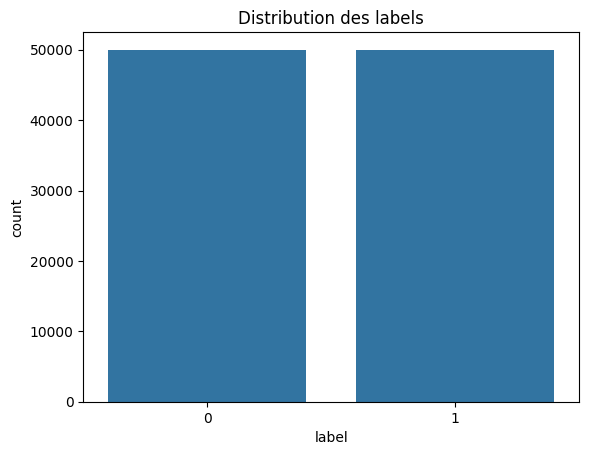

In [6]:
sns.countplot(data = df_cleaned, x = 'label')
plt.title('Distribution des labels')
plt.show()

## 4.2 - Longueur des tweets

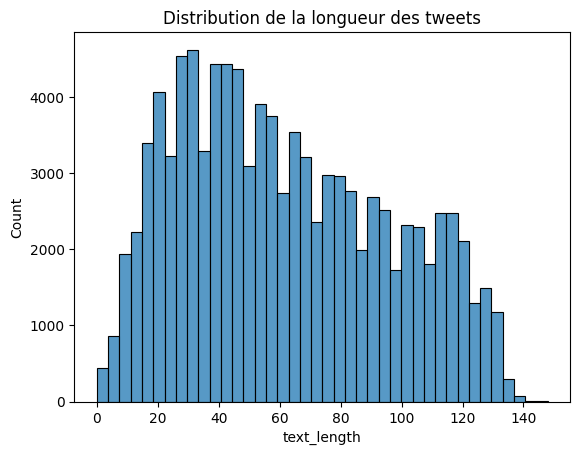

In [7]:
df_cleaned['text_length'] = df_cleaned['text'].apply(len)

sns.histplot(df_cleaned['text_length'], bins = 40)
plt.title('Distribution de la longueur des tweets')
plt.show()

# 5 - Sauvegarde du fichier nettoyé

In [8]:
output_path = '../data/processed/tweets_cleaned.csv'
os.makedirs(os.path.dirname(output_path), exist_ok = True)
df_cleaned.to_csv(output_path, index = False)

print(f'Données nettoyées sauvegardées dans : {output_path}')

Données nettoyées sauvegardées dans : ../data/processed/tweets_cleaned.csv


In [10]:
from arborescence import afficher_arborescence
afficher_arborescence(project_root, max_niveaux=3)

├── %USERPROFILE%.git-credentials
├── .coverage
├── .git
│   ├── AUTO_MERGE
│   ├── COMMIT_EDITMSG
│   ├── FETCH_HEAD
│   ├── HEAD
│   ├── MERGE_MSG
│   ├── ORIG_HEAD
│   ├── REBASE_HEAD
│   ├── config
│   ├── description
│   ├── hooks
│   │   ├── applypatch-msg.sample
│   │   ├── commit-msg.sample
│   │   ├── fsmonitor-watchman.sample
│   │   ├── post-update.sample
│   │   ├── pre-applypatch.sample
│   │   ├── pre-commit.sample
│   │   ├── pre-merge-commit.sample
│   │   ├── pre-push.sample
│   │   ├── pre-rebase.sample
│   │   ├── pre-receive.sample
│   │   ├── prepare-commit-msg.sample
│   │   ├── push-to-checkout.sample
│   │   ├── sendemail-validate.sample
│   │   └── update.sample
│   ├── index
│   ├── info
│   │   └── exclude
│   ├── logs
│   │   ├── HEAD
│   │   └── refs
│   ├── objects
│   │   ├── 00
│   │   ├── 01
│   │   ├── 02
│   │   ├── 03
│   │   ├── 04
│   │   ├── 05
│   │   ├── 06
│   │   ├── 07
│   │   ├── 08
│   │   ├── 09
│   │   ├── 0a
│   │   ├── 0b
│   │   ├── 0c